$$X_t = bX_{t-1} + \varepsilon_t$$

$$X_t = \sum_{i = 0}^{t - 1}b^i \varepsilon_{t - i}$$

In [230]:
import numpy as np
import matplotlib.pyplot as plt

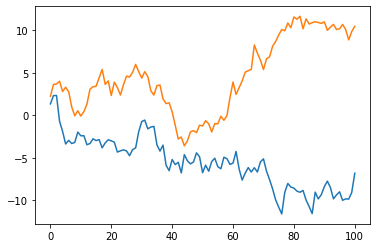

In [391]:
a = 0.99
b = 0.99
T = 101

def gen_ar1(a, T, s = 1):
    
    X = np.zeros(T)
    noises = np.random.normal(0, s, T)
    
    X[0] = noises[0]
    
    for t in range(1, T):
        X[t] = a * X[t - 1] + noises[t]
        
    return X, noises
    
X_1, e_1 = gen_ar1(a, T)
X_2, e_2 = gen_ar1(b, T)

plt.plot(X_1)
plt.plot(X_2)

In [392]:
def ar_t(a, X, noises, t):
    total = 0
    
    for i in range(t + 1):
        total += a ** i * noises[t - i]
        
    return total

ar_t(b, X_2, e_2, 3)

4.011542004098094

In [393]:
lst = sum([ar_t(a, X_1, e_1, i) for i in range(T)])
print(sum(X_1))
print(lst)

-561.8778786515983
-561.8778786515985


In [394]:
def sum_ar_t(a, X, noises):
    print(sum(X))
    
    total = 0
    for t in range(T):
        for i in range(T - t):
            total += a ** i * noises[t]
    
    print(total)
    
    total = 0
    for t in range(T):
        total += noises[t] * (1 - a ** (T - t)) / (1 - a)
            
    print(total)
    
sum_ar_t(b, X_2, e_2)

460.3248504735934
460.32485047359444
460.32485047359364


\begin{align*}
    \sum_{t = 1}^T X_t^2 &= \sum_{t = 1}^T \left(\sum_{i = 0}^{t - 1} a^i \varepsilon_{t - i}\right)^2\\
    &= \sum_{t = 1}^T \left(\sum_{i = 0}^{t - 1} \sum_{j = 0}^{t - 1} a^{i + j} \varepsilon_{t - i} \varepsilon_{t - j}\right)
\end{align*}

In [395]:
def sum_ar_sq(a, X, noises):
    print(sum(X ** 2))
    
    total = 0
    for t in range(T):
        total += sum([a ** i * noises[t - i] for i in range(t + 1)]) ** 2
    
    print(total)
    
    total = 0
    for t in range(T):
        for i in range(t + 1):
            for j in range(t + 1):
                total += a ** (i + j) * noises[t - i] * noises[t - j]
            
    print(total)
    
    total = 0
    for i in range(T):
        for j in range(T):
            coef = 0
            for t in range(T - i - j):
                coef += a ** (2 * t)
            total += coef * noises[i] * noises[j]
            
    print(total)
    

X_2, e_2 = gen_ar1(b, T)
sum_ar_sq(b, X_2, e_2)

2241.192865712628
2241.1928657126273
2241.1928657126005
-224.98390119862128


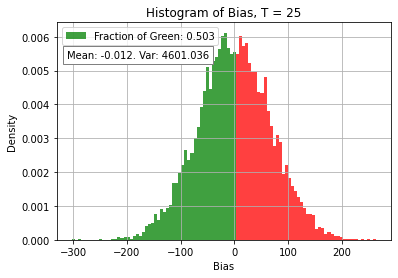

In [418]:
sums = []
sums_sq = []
coefs = []

a = 0.99
T = 25
for i in range(10000):
    X_1, e_1 = gen_ar1(a, T)
    noises = np.random.normal(0, 1, T)
    sums.append(sum(X_1))
    sums_sq.append(sum(X_1 ** 2))
    coefs.append(sum(X_1 * noises) / sum(X_1 ** 2) * np.cov(X_1))
    
# the histogram of the data
lst = (np.array(sums))
f = plt.figure()
ax = f.add_subplot(111)

n, bins, patches = ax.hist(lst, 100, density=True, facecolor='g', alpha=0.75, label = f"Fraction of Green: {sum(lst < 0) / len(lst)}")

for b, p in zip(bins, patches):
    if b > 0:
        p.set_facecolor("red")
    
plt.xlabel('Bias')
plt.ylabel('Density')
plt.title(f'Histogram of Bias, T = {T}')
t = plt.text(0.03, 0.85, f'Mean: {round(lst.mean(), 3)}. Var: {round(lst.var(), 3)}', ha='left', va='center', transform=ax.transAxes)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor = 'grey'))
plt.grid(True)
plt.legend()
plt.show()

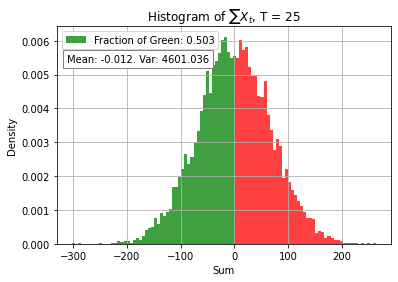

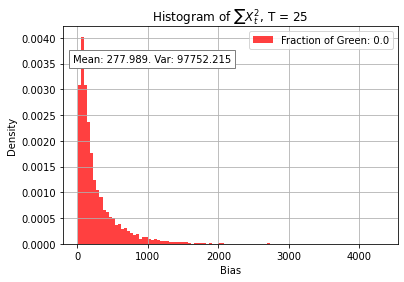

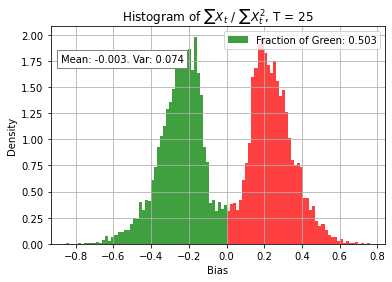

In [422]:
# the histogram of the data
lst = (np.array(sums))
f = plt.figure()
ax = f.add_subplot(111)

n, bins, patches = ax.hist(lst, 100, density=True, facecolor='g', alpha=0.75, label = f"Fraction of Green: {sum(lst < 0) / len(lst)}")

for b, p in zip(bins, patches):
    if b > 0:
        p.set_facecolor("red")
    
plt.xlabel('Sum')
plt.ylabel('Density')
plt.title(f'Histogram of $\sum X_t$, T = {T}')
t = plt.text(0.03, 0.85, f'Mean: {round(lst.mean(), 3)}. Var: {round(lst.var(), 3)}', ha='left', va='center', transform=ax.transAxes)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor = 'grey'))
plt.grid(True)
plt.legend()
plt.show()

# the histogram of the data
lst = (np.array(sums_sq))
f = plt.figure()
ax = f.add_subplot(111)

n, bins, patches = ax.hist(lst, 100, density=True, facecolor='g', alpha=0.75, label = f"Fraction of Green: {sum(lst < 0) / len(lst)}")

for b, p in zip(bins, patches):
    if b > 0:
        p.set_facecolor("red")
    
plt.xlabel('Bias')
plt.ylabel('Density')
plt.title(f'Histogram of $\sum X_t^2$, T = {T}')
t = plt.text(0.03, 0.85, f'Mean: {round(lst.mean(), 3)}. Var: {round(lst.var(), 3)}', ha='left', va='center', transform=ax.transAxes)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor = 'grey'))
plt.grid(True)
plt.legend()
plt.show()

# the histogram of the data
lst = (np.array(sums) / np.array(sums_sq))
f = plt.figure()
ax = f.add_subplot(111)

n, bins, patches = ax.hist(lst, 100, density=True, facecolor='g', alpha=0.75, label = f"Fraction of Green: {sum(lst < 0) / len(lst)}")

for b, p in zip(bins, patches):
    if b > 0:
        p.set_facecolor("red")
    
plt.xlabel('Bias')
plt.ylabel('Density')
plt.title(f'Histogram of $\sum X_t\ /\ \sum X_t^2$, T = {T}')
t = plt.text(0.03, 0.85, f'Mean: {round(lst.mean(), 3)}. Var: {round(lst.var(), 3)}', ha='left', va='center', transform=ax.transAxes)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor = 'grey'))
plt.grid(True)
plt.legend()
plt.show()

In [417]:
t = 1
print(sum([((1 - a ** (T - t)) / (1 - a)) ** 2 for t in range(T)]))

print(1 / (1 - a) ** 2 * (T - 2 * sum([a ** (T - t) for t in range(T)]) + sum([a ** (2 * (T - t)) for t in range(T)])))
print(1 / (1 - a) ** 2 * (T - 2* a * (1 - a ** (T)) / (1 - a) + a ** 2 * (1 - a ** (2 * T)) / (1 - a ** 2)))

93.33333357175191
93.33333357175191
93.33333357175191


In [414]:
print(sum([a ** (T - t) for t in range(T)]))
print(sum([a ** (t) for t in range(1, T + 1)]))
print((a - a ** (T + 1)) / (1 - a))

0.9999999701976776
0.9999999701976776
0.9999999701976776


### Distribution of $$\sum_{t = 1}^T X_t.$$

We have 
\begin{align*}
    \sum_{t = 1}^T X_t &= \sum_{t = 1}^T \sum_{i = 0}^{t - 1} a^i \varepsilon_{t - i}\\
    &= \sum_{t = 1}^T \sum_{i = 0}^{T - t} a^{i} \varepsilon_{t}. \\
    &= \sum_{t = 1}^T \frac{1 - a^{T - t}}{1 - a} \varepsilon_{t}.
\end{align*}

#### Distribution of the Mean
Now, $$\mathbb{E}\left[\varepsilon_t \right] = 0\ \forall\ t.$$

So, \begin{align*}
    \mathbb{E}\left[\sum_{t = 1}^T X_t\right] &= \mathbb{E}\left[\sum_{t = 1}^T \frac{1 - a^{T - t}}{1 - a} \varepsilon_{t}\right] \\ &= \sum_{t = 1}^T \frac{1 - a^{T - t}}{1 - a}\mathbb{E}\left[\varepsilon_{t}\right]\\
    &= \sum_{t = 1}^T \frac{1 - a^{T - t}}{1 - a} \cdot 0 \\ &= 0
\end{align*}

#### Distribution of the Covariance
Now, $$\mathbb{V}\left[\varepsilon_t \right] =\sigma^2\ \forall\ t.$$

So, So, \begin{align*}
    \mathbb{V}\left[\sum_{t = 1}^T X_t\right] &= \mathbb{V}\left[\sum_{t = 1}^T \frac{1 - a^{T - t}}{1 - a} \varepsilon_{t}\right] \\ &= \sum_{t = 1}^T \left(\frac{1 - a^{T - t}}{1 - a}\right)^2 \mathbb{V}\left[\varepsilon_{t}\right]\\
    &= \sum_{t = 1}^T \left(\frac{1 - a^{T - t}}{1 - a}\right)^2 \cdot \sigma^2 \\ 
    &= \frac{\sigma^2}{(1 - a)^2} \sum_{t = 1}^T 1 - 2 a^{T - t} + a^{2(T - t)} \\
    &= \frac{\sigma^2}{(1 - a)^2} \left(T - 2a \frac{1 - a^{T}}{1 - a} + a^2\frac{1 - a^{2T}}{1 - a^2}\right) \\
\end{align*}

### Distribution of $$\sum_{t = 1}^T X_t ^2.$$

We have 
\begin{align*}
    \sum_{t = 1}^T X_t^2 &= \sum_{t = 1}^T \left(\sum_{i = 0}^{t - 1} a^i \varepsilon_{t - i}\right)^2\\
    &= \sum_{t = 1}^T \left(\sum_{i = 0}^{t - 1} \sum_{j = 0}^{t - 1} a^{i + j} \varepsilon_{t - i} \varepsilon_{t - j}\right).
\end{align*}

#### Distribution of the Mean
Now, $$\mathbb{E}\left[\varepsilon_i \varepsilon_j \right] = \begin{cases} \sigma^2 & if i = j \\ 0 & otherwise \end{cases}.$$

So, \begin{align*}
    \mathbb{E}\left[\sum_{t = 1}^T X_t^2\right] &= \sum_{t = 1}^T \mathbb{E}\left[\left(\sum_{i = 0}^{t - 1} a^i \varepsilon_{t - i}\right)^2\right]\\
    &= \sum_{t = 1}^T \left(\sum_{i = 0}^{t - 1} \sum_{j = 0}^{t - 1} a^{i + j} \mathbb{E}\left[\varepsilon_{t - i} \varepsilon_{t - j}\right]\right). \\ &=  \sum_{t = 1}^T \left(\sum_{i = 0}^{t - 1} a^{2i} \sigma^2\right). \\ &= \sigma^2 \left(\sum_{t = 1}^T \left(\frac{1 - a^{2t}}{1 - a^2}\right)\right) \\ &= \sigma^2 \left(\left(\frac{T - \sum_{t = 1}^Ta^{2t}}{1 - a^2}\right)\right) \\ &= \sigma^2 \left(\left(\frac{T - \frac{a^2 - a^{2(T + 1)}}{1 - a^2}}{1 - a^2}\right)\right)
\end{align*}

#### Distribution of the Covariance
Now, $$\mathbb{V}\left[\varepsilon_i \varepsilon_j \right] = \begin{cases} \sigma^4 & if i \neq j \\ 2\sigma^4 & otherwise \end{cases}.$$

So, \begin{align*}
    \mathbb{V}\left[\sum_{t = 1}^T X_t^2\right] &= \sum_{t = 1}^T \mathbb{V}\left[\left(\sum_{i = 0}^{t - 1} a^i \varepsilon_{t - i}\right)^2\right]\\
    &= \sum_{t = 1}^T \left(\sum_{i = 0}^{t - 1} \sum_{j = 0}^{t - 1} a^{i + j} \mathbb{V}\left[\varepsilon_{t - i} \varepsilon_{t - j}\right]\right). \\ &=  \sum_{t = 1}^T \left(\sum_{i = 0}^{t - 1} a^{2i} \sigma^2\right). \\ &= \sigma^2 \left(\sum_{t = 1}^T \left(\frac{1 - a^{2t}}{1 - a^2}\right)\right) \\ &= \sigma^2 \left(\left(\frac{T - \sum_{t = 1}^Ta^{2t}}{1 - a^2}\right)\right) \\ &= \sigma^2 \left(\left(\frac{T - \frac{a^2 - a^{2(T + 1)}}{1 - a^2}}{1 - a^2}\right)\right)
\end{align*}

In [380]:
total = 0
for t in range(T):
    for i in range(t + 1):
        total += a ** (2 * i) 
        
print(total)

total = 0
for t in range(T):
    total += (1 - a ** (2 * (t + 1))) / (1 - a ** 2)
        
print(total)

print((T - (a ** 2 * (1 - a ** (2 * T)) / (1 - a ** 2))) / (1 - a ** 2))

print(T / (1 - a ** 2) - a ** 2 * (1 - a ** (2 * T)) / (1 - a ** 2) ** 2)

32.888888888888886
32.888888888888886
32.88888888888889
32.88888888888889


In [423]:
total = 0
for t in range(T):
    for i in range(t + 1):
        for j in range(t + 1):
            if i != j:
                total += (a ** (i + j)) ** 2
            
    for i in range(t + 1):
        total += 2 * (a ** (2 * i)) ** 2
        
print(total)

total = 0
for t in range(T):
    total += (1 - a ** (2 * (t + 1))) / (1 - a ** 2)
        
print(total)

print((T - ((1 - a ** (2 * T)) / (1 - a ** 2))) / (1 - a ** 2))

print(T / (1 - a ** 2) - (1 - a ** (2 * T)) / (1 - a ** 2) ** 2)

4148.848797963845
278.6961096979864
258.84716834811445
258.84716834811434


In [425]:
total = T * 1 / (1 - b ** 2)
print(total)

56.37754403027047
